In [1]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
references_df = pd.read_csv('data/references.csv')

In [3]:
references_df.head()

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,identifier
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",2018,1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2018,2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",2018,1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",2018,1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2018,2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


In [4]:
references_df['identifier'] = references_df['identifier'].apply(lambda x : x.lower())


In [5]:
rootdir = 'data/papers'

In [6]:
contents = []
source = []
errors = []
paths = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        paths.append(path)
        with open(path) as file:
            try:
                text = file.read()
                contents.append(text)
                source.append(subdir[len(rootdir):])
            except:
                name, message, content = sys.exc_info()
                errors.append(message)

In [7]:
dict_matching = {}

In [8]:
for i,elem in enumerate(paths): 
    dict_matching[elem[elem.find('import'):elem.find('.txt')]] = contents[i][:contents[i].find('\r')]

In [9]:
dict_matching

{'import2015full_105': '\xe2\x80\x9cThat\xe2\x80\x99s What Everyone Else Is Saying\xe2\x80\xa6\xe2\x80\x9d:',
 'import2015full_122': 'The 3R Orchestration Cycle:',
 'import2015full_126': 'Principle-Based Guidance to Foster Adaptive Teaching Practice',
 'import2015full_136': 'Connected Biology: A Usability Study of Web 2.0 Tools',
 'import2015full_146': 'A Multivocality Approach to Epistemic Agency',
 'import2015full_150': '\xe2\x80\x9cThis Is the Size of One Meter\xe2\x80\x9d: Children\xe2\x80\x99s Bodily-Material',
 'import2015full_154': 'The Development of Situational-Misconceptions',
 'import2015full_158': 'Dialogism:',
 'import2015full_162': 'Boundary Interactions: Resolving Interdisciplinary Collaboration',
 'import2015full_165': 'Design Features for Computer-Supported Complex Systems',
 'import2015full_167': 'A Long-Term View on Learning to Argue in Facebook:',
 'import2015full_169': 'Beyond Pedagogical Challenges: Addressing the Social Aspects',
 'import2015full_171': 'Construct

In [10]:
pd.DataFrame.from_dict(dict_matching,orient = 'index').to_csv('dict_file_matching.csv')

In [11]:
list_ = []
for file in tqdm(references_df['file']):
    try : 
        list_.append(dict_matching[file])
    except KeyError: 
        print(file)

100%|██████████| 14606/14606 [00:00<00:00, 709995.99it/s]


In [12]:
references_df['titles'] = list_ 

In [13]:
references_df.head()

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,identifier,titles
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",2018,1991.0,"lave, j., & wenger, e. (1991). situated learni...",Learning Scientific Practices Through Particip...
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2018,2013.0,"miles, m. b., huberman, a. m., & saldana, j. (...",Learning Scientific Practices Through Particip...
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",2018,1997.0,"pea, r. d., gomez, l. m., edelson, d. c., fish...",Learning Scientific Practices Through Particip...
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",2018,1995.0,"rogoff, b. (1995). observing sociocultural act...",Learning Scientific Practices Through Particip...
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2018,2012.0,"shirk, j., ballard, h., wilderman, c., phillip...",Learning Scientific Practices Through Particip...


In [14]:
groupped_by = references_df.groupby(by ='titles')

In [15]:
dict_of_references_by_title = {}

In [16]:
set(groupped_by.get_group('The Effect of Scaffolding on the Immediate Transfer of Students’')['identifier'])

{'chinn, c., & brewer, w. (1993). the role of anomalous data in knowledge acquisition: a theoretical framework and implications for science instruction',
 'gobert, j. d., sao pedro, m., raziuddin, j., & baker, r. s. (2013b). from log files to assessment metrics for science inquiry using educational data mining',
 "gotwals, a. w., & songer, n. b. (2009). reasoning up and down a food chain: using an assessment framework to investigate students' middle knowledge",
 'kang, h., thompson, j., & windschitl, m. (2014). creating opportunities for students to show what they know: the role of scaffolding in assessment tasks',
 'klayman, j. (1995). varieties of confirmation bias',
 'kuhn, d., schauble, l., & garcia-mila, m. (1992). cross-domain development of scientific reasoning',
 'mcneill, k. l., & krajcik, j. s. (2011). supporting grade 5-8 students in constructing explanations in science: the claim, evidence, and reasoning framework for talk and writing',
 'moussavi, r., kennedy, m., sao pedr

In [17]:
references_df['titles'].unique()

array(['Learning Scientific Practices Through Participation as a Volunteer',
       'Visualizing Complex Classrooms Through Real Time Observations',
       'Opening the Door to Algebra: The Role of Fraction Knowledge in',
       'Measuring Maker Mindset: Establishing Content Validity With Card',
       'Fostering University Freshmen\xe2\x80\x99s Mathematical Argumentation',
       'The Effect of Concrete Materials on Children\xe2\x80\x99s Subsequent',
       '\xe2\x80\x9cMy Favorite Part Is When We Tell the Truth\xe2\x80\x9d: Identity and Agency',
       'Expanding Outcomes: Exploring Varied Forms of Teacher',
       'Scaffolding Into Ambitious Teaching: Representations of',
       'Revising Biology Misconceptions Using an Online Activity With',
       'Evaluating Innovative Collaborative Learning Practice:',
       'Knowledge Construction in the Instrumented Classroom:',
       'Fostering and Reflecting on Diverse Perspective-Taking in',
       'Symbiotic Learning Partnerships in Yout

In [18]:
for title in references_df['titles'].unique():
    dict_of_references_by_title[title] = set(groupped_by.get_group(title)['identifier'])

In [19]:
nodes = references_df['titles'].unique()

In [20]:
adjacency = np.zeros((len(nodes),len(nodes)))

In [21]:
for i,doc1 in enumerate(nodes):
    for j,doc2 in enumerate(nodes):
        if len(dict_of_references_by_title[doc1] & dict_of_references_by_title[doc2]) != 0 : 
            adjacency[i][j] = 1


In [22]:
adjacency

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
def matrix_to_list(matrix):
    graph = {}
    for i, node in enumerate(matrix):
        adj = []
        for j, connected in enumerate(node):
            if connected:
                adj.append(j)
        graph[i] = adj
    return graph

In [24]:
graph = matrix_to_list(adjacency)

In [25]:
G=nx.Graph(graph)

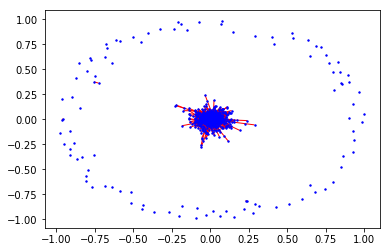

In [27]:
nx.draw_networkx(G,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G))
plt.show()


In [28]:
from networkx.algorithms.community import k_clique_communities

In [29]:
#k_clique = list(k_clique_communities(G, 7))

In [30]:
subgraphs = list(nx.connected_component_subgraphs(G))

In [31]:
subgraphs[0]

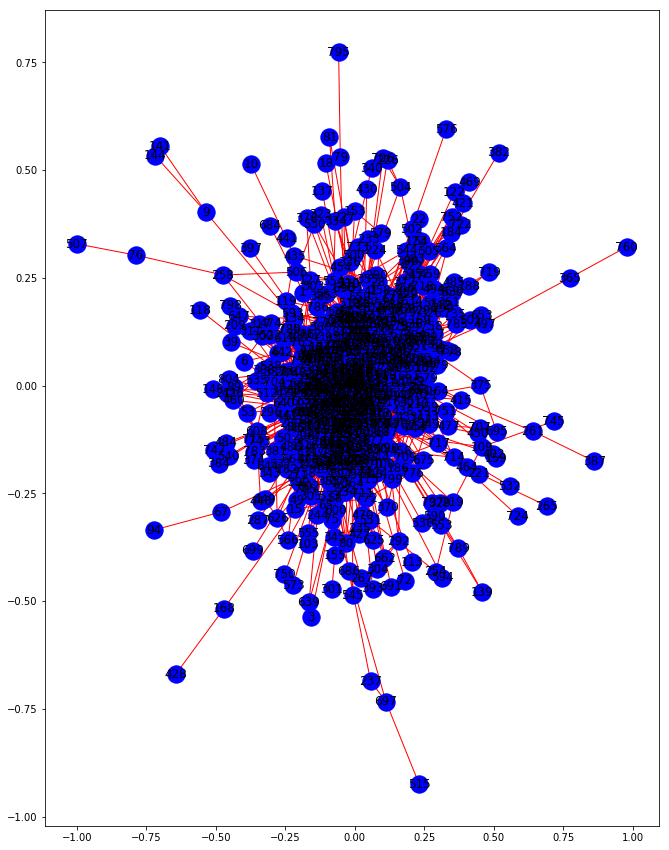

In [32]:
plt.figure(figsize=[11,15])
nx.draw_networkx(subgraphs[0],node_color='b',edge_color='r',with_labels=True,pos= nx.spring_layout(subgraphs[0]))
plt.show()

In [26]:
import graphistry
graphistry.register(key='370c9675be7ab15766e38af1906aa8e77a1265cbcf26256dcc1eb6c223e5bf40')


In [34]:
graphistry.nodes(subgraphs[0].nodes()).edges(subgraphs[0].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(subgraphs[0])

In [36]:
strongest_community = subgraphs[0].nodes()

In [37]:
len(strongest_community)

701

### Using_identifier

In [27]:
parsed_meta = pd.read_csv('/Users/nourghaliaabassi/Desktop/final_sem_project/semester-project/data/Parsed_metadata.csv')

In [28]:
parsed_meta.head()

,Unnamed: 0,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,long_name,author_order,shortend_names,identifier
0,0,import2016full_61,NaN,en,info:doi/10.22318/icls2016.61,Book chapter,Singapore: International Society of the Learni...,Exposing Piaget’s Scheme: Empirical Evidence f...,2016-07,2017-03-21 12:05:42+00:00,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",2017-03-21 12:05:42+00:00,The combination of two methodological resource...,"Abrahamson, Dor",0,Abrahamson D.,"Abrahamson, D., Shayan, S., Bakker, A., & van ..."
1,1,import2016full_95,NaN,en,info:doi/10.22318/icls2016.95,Book chapter,Singapore: International Society of the Learni...,Secondary Teachers’ Emergent Understanding of ...,2016-07,2017-03-21 12:05:42+00:00,"Sandoval, W. A., Kawasaki, J., Cournoyer, N., ...",2017-03-21 12:05:42+00:00,Abstract: The Next Generation Science Standard...,"Sandoval, William A.",0,Sandoval W. A.,"Sandoval, W. A., Kawasaki, J., Cournoyer, N., ..."
2,2,import2016full_59,NaN,en,info:doi/10.22318/icls2016.59,Book chapter,Singapore: International Society of the Learni...,Blending Play and Inquiry in Augmented Reality...,2016-07,2017-03-21 12:05:42+00:00,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...",2017-03-21 12:05:42+00:00,Researchers have increasingly demonstrated how...,"DeLiema, David",0,DeLiema D.,"DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D..."
3,3,import2016full_92,NaN,en,info:doi/10.22318/icls2016.92,Book chapter,Singapore: International Society of the Learni...,Making Sense of Making Waves: Co-constructing ...,2016-07,2017-03-21 12:05:42+00:00,"Hardy, L. & White, T. (2016). Making Sense of ...",2017-03-21 12:05:42+00:00,In this paper we argue that collaborative lear...,"Hardy, Lisa",0,Hardy L.,"Hardy, L. & White, T. (2016). Making Sense of ..."
4,4,import2016full_66,NaN,en,info:doi/10.22318/icls2016.66,Book chapter,Singapore: International Society of the Learni...,The Effects of Coaching on the Teaching and Le...,2016-07,2017-03-21 12:05:42+00:00,"Raval, H., Kaul, C., & McKenney, S. (2016). Th...",2017-03-21 12:05:42+00:00,Although English is mandatorily introduced as ...,"Raval, Harini",0,Raval H.,"Raval, H., Kaul, C., & McKenney, S. (2016). Th..."


In [29]:
dict_matching_unique = dict(zip(parsed_meta['file'],parsed_meta['identifier']))

In [30]:
#dict_matching_unique.keys()

In [31]:
def matching (x) : 
    #x = x.replace('_','/')
    try :
        if x in nans.values: 
            #x = x.replace('/','_')
            #print('nan_on {}'.format(x))
            return dict_matching[x]
        else :
            return dict_matching_unique[x]
    except KeyError:
        print('key_error on {}'.format(x))
        x = x.replace('/','_')
        return dict_matching[x]

In [32]:
nans = parsed_meta[parsed_meta['identifier'].isnull()]['file']

In [33]:
references_df['identifier_title'] = references_df['file'].apply(lambda x : matching(x))

In [34]:
references_df['identifier_title'][0]

'Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist'

In [35]:
references_df.to_csv('references_nour.csv')

In [36]:
references_df['identifier_title'] = references_df['identifier_title'].apply(lambda x : x.lower())

### Doc  References graph 

In [37]:
#nodes_doc_ref = set(references_df.identifier_title).union(set(references_df.identifier))

In [50]:
groups = references_df.groupby(by = 'identifier_title')

In [53]:
groups.get_group('Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist'.lower())

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,identifier,titles,identifier_title
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",2018,1991.0,"lave, j., & wenger, e. (1991). situated learni...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2018,2013.0,"miles, m. b., huberman, a. m., & saldana, j. (...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",2018,1997.0,"pea, r. d., gomez, l. m., edelson, d. c., fish...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",2018,1995.0,"rogoff, b. (1995). observing sociocultural act...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2018,2012.0,"shirk, j., ballard, h., wilderman, c., phillip...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."


In [54]:
references_df.groupby('identifier').count()[references_df.groupby('identifier').count()['year']>30]

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,titles,identifier_title
identifier,,,,,,,,
"jordan, b., & henderson, a. (1995). interaction analysis: foundations and practice",37,37,37,37,37,37,37,37
"lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation",35,35,35,35,35,35,35,35
"scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge",35,35,35,35,35,35,35,35


In [55]:
#groups.get_group('Kolowich, S. (2013, May 1). Faculty backlash grows against online partners')

In [56]:
#graph.items
graph = dict()
for title in references_df.identifier_title: 
    try : 
        graph[title] = list(groups.get_group(title).identifier)
    except KeyError:
        graph[title] = []

In [57]:
count = 0
for key, value in graph.items():
    if 'Wenger, E. (1998). Communities of practice: Learning, meaning, and identity'.lower() in value:
        count = count + 1

In [58]:
count

16

In [60]:
graph['Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist'.lower()]

['lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation',
 'miles, m. b., huberman, a. m., & saldana, j. (2013). qualitative data analysis: a methods sourcebook',
 'pea, r. d., gomez, l. m., edelson, d. c., fishman, b. j., gordin, d. n., & o\xe2\x80\x99neill, d. k. (1997). science education as a driver of cyberspace technology development',
 'rogoff, b. (1995). observing sociocultural activity on three planes: participatory appropriation, guided participation, and apprenticeship',
 'shirk, j., ballard, h., wilderman, c., phillips, t., wiggins, a., jordan, r., ... & bonney, r. (2012). public participation in scientific research: a framework for deliberate design']

In [61]:
graph = dict()
for title in references_df.identifier_title: 
    try : 
        graph[title] = list(groups.get_group(title).identifier)
    except KeyError:
        graph[title] = []

In [62]:
G_doc = nx.DiGraph(graph)

In [63]:
see = G_doc.degree()
list(see)

[('chounta, i.-a., giemza, a., & hoppe, h. u. (2014). multilevel analysis of collaborative activities based on a mobile learning scenario for real classrooms',
  1),
 ('gweon, g., rose, c., carey, r., & zaiss, z. (2006). providing support for adaptive scripting in an on-line collaborative learning environment proceedings of the sigchi conference on human factors in computing systems (pp',
  1),
 ('chin, w. w., salisbury, w. d., pearson, a. w., & stollak, m. j. (1999). perceived cohesion in small groups: adapting and testing the perceived cohesion scale in a small-group setting',
  1),
 ('wenger, e. (1998). community of practices: learning, meaning, and identity',
  1),
 ('bereiter, c., & scardamalia, m. (2014). knowledge building and knowledge creation: one concept, two hills to climb',
  2),
 ('van aalst, j., & hill, c. m. (2006). activity theory as a framework for analysing knowledge building',
  1),
 ('becker, h. s. (1972). \xe2\x80\x9ca school is a lousy place to learn anything in'

In [64]:
for key in list(see):
    if key[0]== 'Wenger, E. (1998). Communities of practice: Learning, meaning, and identity':
        print('hey')

In [65]:
len(set(G_doc.nodes()))

11647

In [66]:
import operator

In [67]:
sorted(dict(see).items(), key=operator.itemgetter(1),reverse=True)

[('margulieux, l. e., mccracken, w. m., & catrambone, r. (2015). mixing in-class and online learning: content meta-analysis of outcomes for hybrid, blended, and flipped courses in  lindwall, o',
  77),
 ('abrahamson, d., s\xc3\xa1nchez\xe2\x80\x93garc\xc3\xada, r., & smyth, c. (2016). metaphors are projected constraints on action: an ecological dynamics view on learning across the disciplines ',
  63),
 ('prinsen, f. r. (2016). supporting inquiry learning as a practice: a practice perspective on the challenges of ibl design, implementation and research methodology ',
  61),
 ('mckeown, j., hmelo-silver, c. e., jeong, h., hartley, k., faulkner, r., & emmanuel, n. (2017). a meta-synthesis of cscl literature in stem education in smith, b',
  58),
 ('uttamchandani, s. (2018). equity in the learning sciences: recent themes and pathways',
  56),
 ('taylor, k. h. & silvis, d. (2017). mobile city science: technology-supported collaborative learning at community scale in smith, b',
  51),
 ("sh

/anaconda3/lib/python2.7/site-packages/networkx/drawing/layout.py:595: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


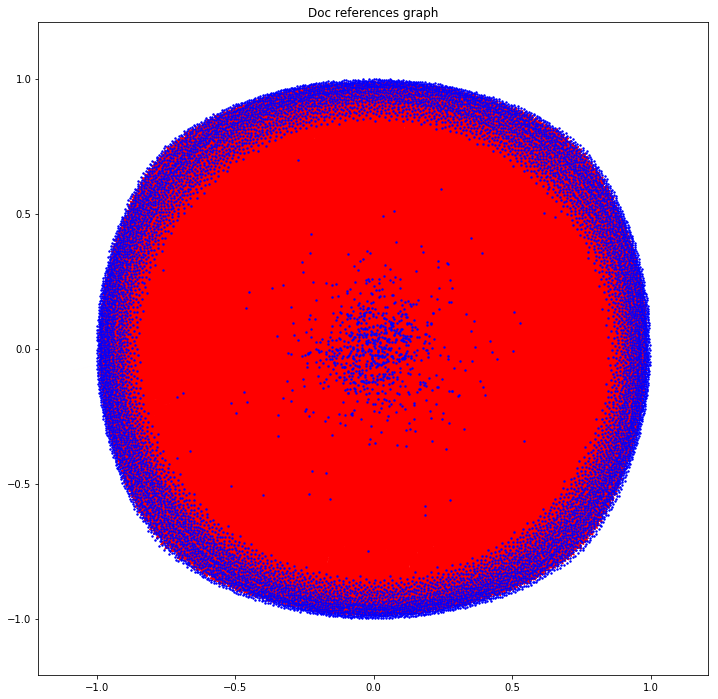

In [68]:
plt.figure(figsize = (12,12))
nx.draw_networkx(G_doc,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G_doc))
plt.title('Doc references graph')
plt.show()


In [69]:
graphistry.nodes(G_doc.nodes()).edges(G_doc.edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(G_doc)

In [70]:
import operator
most_cited = nx.pagerank(G_doc)
most_cited = sorted(most_cited.items(), key=operator.itemgetter(1),reverse=True)
most_cited

[('lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation',
  0.00028695972248094447),
 ('jordan, b., & henderson, a. (1995). interaction analysis: foundations and practice',
  0.0002671554449342556),
 ('national research council. (2012). a framework for k-12 science education: practices, crosscutting concepts, and core ideas',
  0.00025056305845448434),
 ('ngss lead states. (2013). next generation science standards: for states, by states',
  0.00022695772315988694),
 ('scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge',
  0.00022174679392328965),
 ('papert, s. (1980). mindstorms: children, computers, and powerful ideas',
  0.00020853729575054375),
 ('scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology',
  0.00017886029728650648),
 ('wenger, e. (1998). communities of practice: learning, meaning, and identity',
  0.00017807060019234375),
 ('barron, b. (2003). when smart gro

In [71]:
indeg = nx.in_degree_centrality(G_doc)

In [72]:
indeg = sorted(indeg.items(), key=operator.itemgetter(1),reverse=True)
indeg

[('jordan, b., & henderson, a. (1995). interaction analysis: foundations and practice',
  0.0029194573244032285),
 ('lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation',
  0.002833590932509016),
 ('scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge',
  0.002404258973037953),
 ('ngss lead states. (2013). next generation science standards: for states, by states',
  0.002404258973037953),
 ('national research council. (2012). a framework for k-12 science education: practices, crosscutting concepts, and core ideas',
  0.00231839258114374),
 ('papert, s. (1980). mindstorms: children, computers, and powerful ideas',
  0.002146659797355315),
 ('barron, b. (2003). when smart groups fail', 0.0018890606216726772),
 ('scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology',
  0.001717327837884252),
 ('brown, j. s., collins, a., & duguid, p. (1989). situated cognition and the culture 

In [74]:
graph['Swanson, R. D., Hinojosa, L., & Polman, J. L. (2018). Learning Scientific Practices Through Participation as a Volunteer Community Scientist'.lower()]

['lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation',
 'miles, m. b., huberman, a. m., & saldana, j. (2013). qualitative data analysis: a methods sourcebook',
 'pea, r. d., gomez, l. m., edelson, d. c., fishman, b. j., gordin, d. n., & o\xe2\x80\x99neill, d. k. (1997). science education as a driver of cyberspace technology development',
 'rogoff, b. (1995). observing sociocultural activity on three planes: participatory appropriation, guided participation, and apprenticeship',
 'shirk, j., ballard, h., wilderman, c., phillips, t., wiggins, a., jordan, r., ... & bonney, r. (2012). public participation in scientific research: a framework for deliberate design']

### Co-citations in conferences 

In [75]:
graph_in_conf = dict()
in_conf = set(references_df['identifier_title'].apply(lambda x : x.lower()))
for title in in_conf:
    l = set()
    for elem in groups.get_group(title).identifier:
        if elem in in_conf : 
            l.add(elem)
    graph_in_conf[title] = l

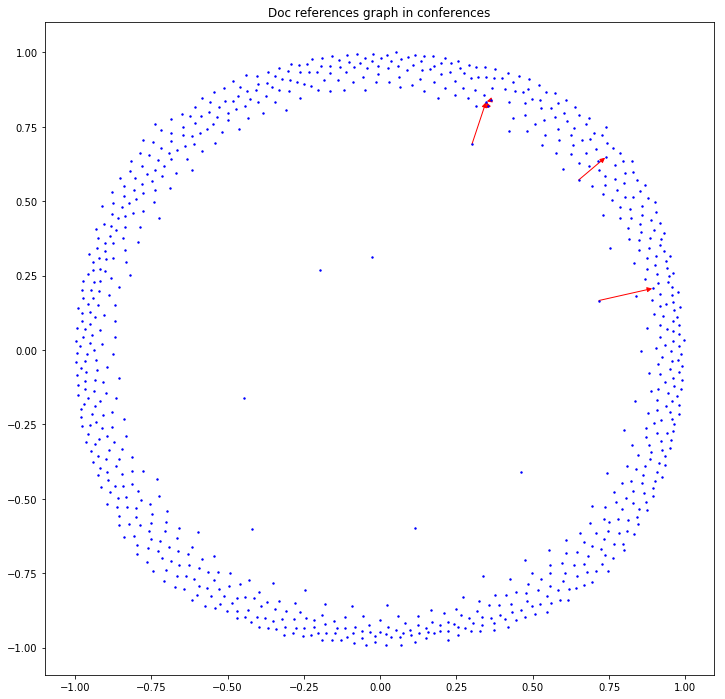

In [76]:
G_inconf = nx.DiGraph(graph_in_conf)
plt.figure(figsize = (12,12))
nx.draw_networkx(G_inconf,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(G_inconf))
plt.title('Doc references graph in conferences')
plt.show()

In [77]:
len(G_inconf.edges())

5

### Third graph

If doc cites a and b there is a link between a and b

In [168]:
from tqdm import tqdm
def create_pairs (groups):
    weights= dict()
    list_of_pairs = set()
    for i,title in enumerate(set(references_df['identifier_title'])):
        seen = set()
        group = groups.get_group(title)['identifier']
        for elem in group : 
            for elem2 in group: 
                if elem != elem2: 
                    if (((elem,elem2)) in list_of_pairs) and ((elem,elem2)) not in seen:
                        w = weights[(elem,elem2)] 
                        weights[(elem,elem2)] = w+1
                    else : 
                        if ((elem2,elem) not in list_of_pairs):
                            seen.add((elem,elem2))
                            weights[(elem,elem2)] = 1 
                            list_of_pairs.add((elem,elem2))
    return weights

In [169]:
weights = create_pairs(groups)

In [170]:
#weights

In [171]:
graph_3 = nx.Graph()
graph_3.add_nodes_from(list(set(references_df.identifier)))
#weighted_edges = list(map(lambda x: (x[0][0],x[0][1],x[1]),weights.items()))
graph_3.add_weighted_edges_from(list(map(lambda x: (x[0][0],x[0][1],x[1]),weights.items())))

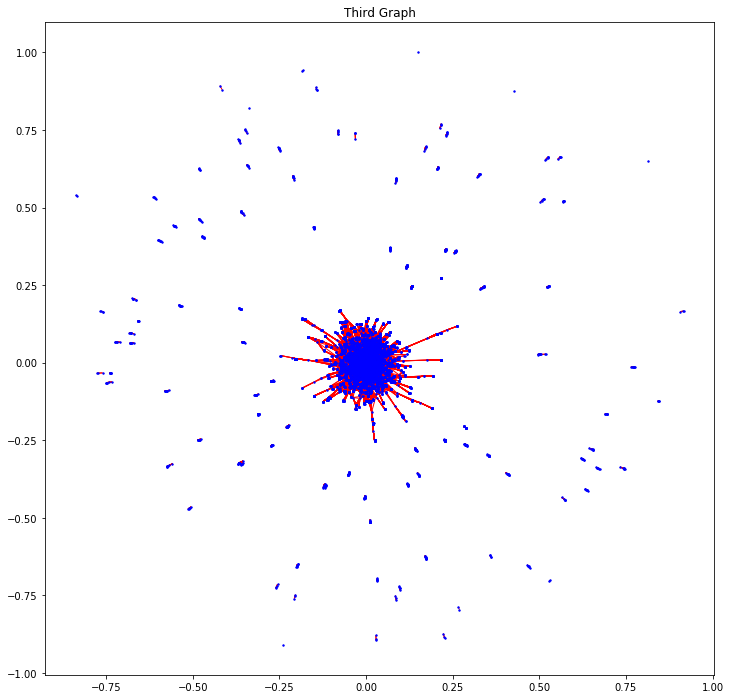

In [85]:
#G_3 =nx.Graph(graph_3)
plt.figure(figsize = (12,12))
nx.draw_networkx(graph_3,node_color='b',edge_color='r',node_size= 2, with_labels=False,pos= nx.spring_layout(graph_3), )
plt.title('Third Graph')
plt.show()

In [86]:
graphistry.nodes(graph_3.nodes()).edges(graph_3.edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(graph_3)

Uploading 7451 kB. This may take a while...


### Graph 4

In [38]:
dict_documents = dict()
for i,elem in enumerate(set(references_df['identifier_title'])):
    dict_documents[elem] = list(set(references_df[references_df['identifier_title'] == elem].identifier))
    

In [197]:
pairs = []
weights_g4 = dict()
for i,doc1 in enumerate(dict_documents.keys()):
    for j,doc2 in enumerate(dict_documents.keys()):
        intersection = set(dict_documents[doc1])&set(dict_documents[doc2])
        if i!=j and (intersection!=set()): 
            if (((doc1,doc2)) not in pairs):
                pairs.append((doc1,doc2))
                weights_g4[(doc1,doc2)] = len(intersection)
            
            

In [193]:
weights_g4_mod = {k: v for k, v in weights_g4.items() if v > 2}

In [198]:
G_intersection = nx.Graph()
G_intersection.add_weighted_edges_from(list(map(lambda x : (x[0][0],x[0][1],x[1]),weights_g4)))

In [199]:
#G_intersection = nx.Graph()
#G_intersection.add_nodes_from(dict_documents.keys())
#G_intersection.add_edges_from(pairs)

In [200]:
graphistry.nodes(G_intersection.nodes()).edges(G_intersection.edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(G_intersection)

### Analysis

### First Graph

The First graph, is a directed graph constructed in this way. For each document, if the document cites another document than there is a link between the document and the cited one. 
From this graph we can see which are the document that are the most cited with the in-degree of each node. 
We can also try to run pagerank algorithm and betweeness centrality algorithm and see if we get the same results. 


### PageRank

In [92]:
pd.DataFrame(sorted(nx.pagerank(G_doc).items(), key=operator.itemgetter(1),reverse=True),columns=['Document','Score']).head(10)

,Document,Score
0,"lave, j., & wenger, e. (1991). situated learni...",0.000287
1,"jordan, b., & henderson, a. (1995). interactio...",0.000267
2,national research council. (2012). a framework...,0.000251
3,ngss lead states. (2013). next generation scie...,0.000227
4,"scardamalia, m. (2002). collective cognitive r...",0.000222
5,"papert, s. (1980). mindstorms: children, compu...",0.000209
6,"scardamalia, m., & bereiter, c. (2006). knowle...",0.000179
7,"wenger, e. (1998). communities of practice: le...",0.000178
8,"barron, b. (2003). when smart groups fail",0.000173
9,"brown, j. s., collins, a., & duguid, p. (1989)...",0.000172


In [43]:
def get_in_deg(G_):
    dict_ = dict(G_.in_degree())
    return pd.DataFrame(sorted(dict_.items(), key=operator.itemgetter(1),reverse=True), columns=['Document','In_degree'])

In [188]:
pd.options.display.max_colwidth = 150
in_degree = get_in_deg(G_doc)
in_degree.head(10)

,Document,In_degree
0,"jordan, b., & henderson, a. (1995). interaction analysis: foundations and practice",34
1,"lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation",33
2,"scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge",28
3,"ngss lead states. (2013). next generation science standards: for states, by states",28
4,"national research council. (2012). a framework for k-12 science education: practices, crosscutting concepts, and core ideas",27
5,"papert, s. (1980). mindstorms: children, computers, and powerful ideas",25
6,"barron, b. (2003). when smart groups fail",22
7,"scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology",20
8,"brown, j. s., collins, a., & duguid, p. (1989). situated cognition and the culture of learning",17
9,"vygotsky, l. s. (1978). mind in society: the development of higher psychological processes",16


In [95]:
graphistry.nodes(G_doc.nodes()).edges(G_doc.edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(G_doc)

### Analysis over years 

The distribution of the references over the years is represented by the graph below 

In [96]:
years = references_df['year'][~references_df['year'].isnull()].apply(lambda x : int(x))

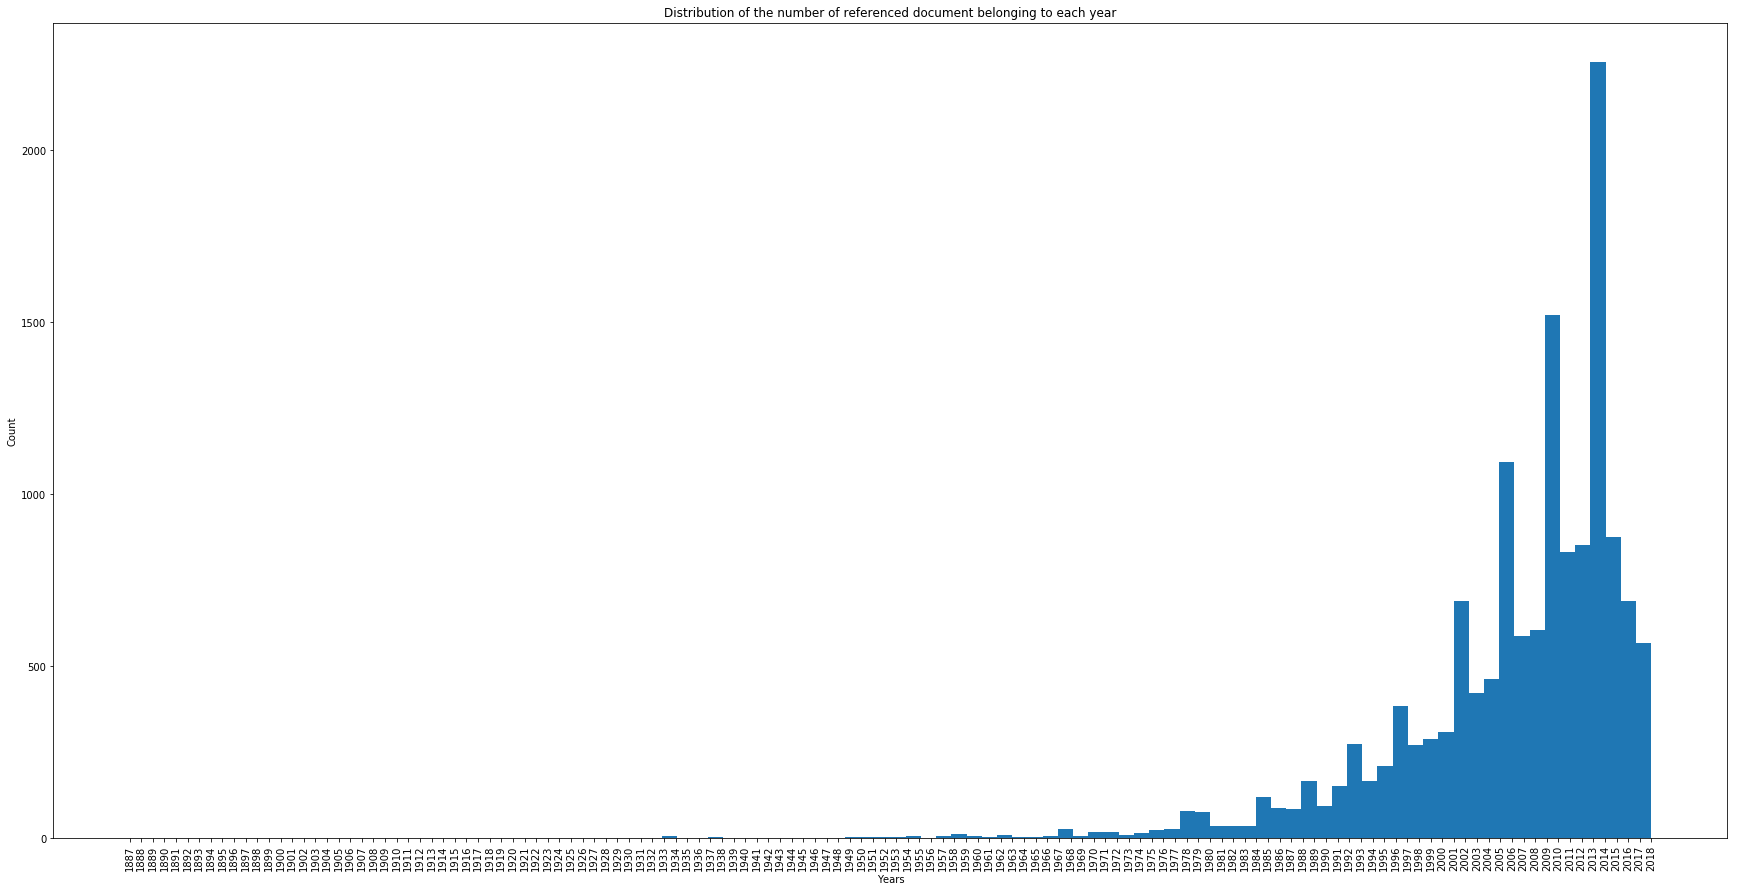

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
x = plt.xticks(np.arange(min(years), max(years)+1, 1))
x = plt.hist(years, bins = 100)
plt.title('Distribution of the number of referenced document belonging to each year')
plt.xlabel('Years')
plt.ylabel('Count')
x =plt.xticks(rotation=90)
plt.savefig('distribution_referenced.png')




In [145]:
in_degree.head(10)

,Document,In_degree,year
0,"jordan, b., & henderson, a. (1995). interactio...",34,1995.0
1,"lave, j., & wenger, e. (1991). situated learni...",33,1991.0
2,"scardamalia, m. (2002). collective cognitive r...",28,2002.0
3,ngss lead states. (2013). next generation scie...,28,2013.0
4,national research council. (2012). a framework...,27,2012.0
5,"papert, s. (1980). mindstorms: children, compu...",25,1980.0
6,"barron, b. (2003). when smart groups fail",22,2003.0
7,"scardamalia, m., & bereiter, c. (2006). knowle...",20,2006.0
8,"brown, j. s., collins, a., & duguid, p. (1989)...",17,1989.0
9,"vygotsky, l. s. (1978). mind in society: the d...",16,1978.0


In [99]:
references_df

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,identifier,titles,identifier_title
0,0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",2018,1991.0,"lave, j., & wenger, e. (1991). situated learni...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
1,1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2018,2013.0,"miles, m. b., huberman, a. m., & saldana, j. (...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
2,2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",2018,1997.0,"pea, r. d., gomez, l. m., edelson, d. c., fish...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
3,3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",2018,1995.0,"rogoff, b. (1995). observing sociocultural act...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
4,4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2018,2012.0,"shirk, j., ballard, h., wilderman, c., phillip...",Learning Scientific Practices Through Particip...,"swanson, r. d., hinojosa, l., & polman, j. l. ..."
5,5,"Gomoll, A., Šabanović, S., Tolar, E., Hmelo-Si...",import2018_417,"Gomoll, A., Šabanović, S., Tolar, E., Hmelo-Si...",2018,2017.0,"gomoll, a., Šabanović, s., tolar, e., hmelo-si...",Visualizing Complex Classrooms Through Real Ti...,"huang, j., gomoll, a. s., tolar, e., silver, c..."
6,6,"Gomoll, A., Hmelo-Silver, C. E., Šabanović, S....",import2018_417,"Gomoll, A., Hmelo-Silver, C. E., Šabanović, S....",2018,2016.0,"gomoll, a., hmelo-silver, c. e., Šabanović, s....",Visualizing Complex Classrooms Through Real Ti...,"huang, j., gomoll, a. s., tolar, e., silver, c..."
7,7,"Hmelo-Silver, C. E., Jordan, R., Liu, L., & Ch...",import2018_417,"Hmelo-Silver, C. E., Jordan, R., Liu, L., & Ch...",2018,2011.0,"hmelo-silver, c. e., jordan, r., liu, l., & ch...",Visualizing Complex Classrooms Through Real Ti...,"huang, j., gomoll, a. s., tolar, e., silver, c..."
8,8,"Mondada, L. (2006). Video recording as the ref...",import2018_417,"Mondada, L. (2006)",2018,2006.0,"mondada, l. (2006). video recording as the ref...",Visualizing Complex Classrooms Through Real Ti...,"huang, j., gomoll, a. s., tolar, e., silver, c..."
9,9,"Knoblauch, H., Schnettler, B., and Raab, J. (2...",import2018_417,"Knoblauch, H., Schnettler, B., and Raab, J. (2...",2018,2006.0,"knoblauch, h., schnettler, b., and raab, j. (2...",Visualizing Complex Classrooms Through Real Ti...,"huang, j., gomoll, a. s., tolar, e., silver, c..."


In [100]:
year = dict(zip(references_df.identifier,references_df.year))

In [101]:
len(references_df.identifier)

14606

In [102]:
references_df.identifier[references_df.identifier == 'knight, s., shibani, a., & buckingham-shum, s. (2018). augmenting formative writing assessment with learning analytics: a design abstraction approach']

Series([], Name: identifier, dtype: object)

In [103]:
def get_year(x):
    try :
        result =  year[x.lower()]
    except KeyError : 
        return 
    return result

In [104]:
in_degree['year'] = in_degree['Document'].apply(get_year)

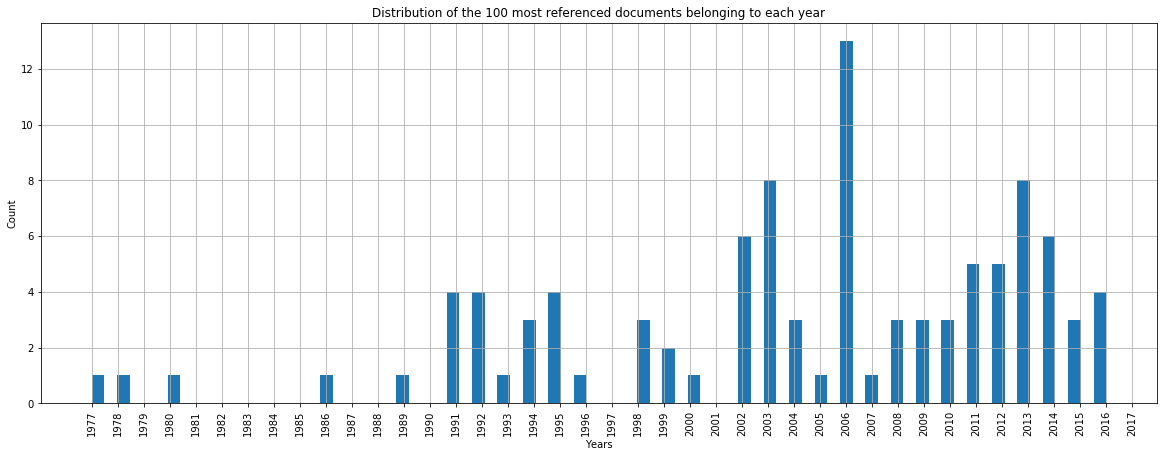

In [143]:
plt.figure(figsize=(20,7))

in_degree['year'][:100].hist(bins = 80)
plt.xticks(rotation=90)

x = plt.xticks(np.arange(min(in_degree['year'][:100]), max(in_degree['year'][:100]+2), 1))
plt.title('Distribution of the 100 most referenced documents belonging to each year')
plt.xlabel('Years')
x = plt.ylabel('Count')
plt.savefig('influencial_count.png')


Most of the most cited documents belongs to 2016 year, more than 12% of the most cited documents belong to this year

### Graph 2 

The Graph 2 is constructed as follows, all the nodes are the references nodes, and the edges are links between documents cited by the same document. Another idea came from this graph, is to create a weighted graph, so that we can see if there some documents that are more likely to be cited together. 


In [106]:
connected_components = list(nx.connected_component_subgraphs(graph_3))

In [107]:
graphistry.nodes(connected_components[0].nodes()).edges(connected_components[0].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(connected_components[0])

Uploading 7079 kB. This may take a while...


In [108]:
len(connected_components[1].edges())

105

In [109]:
graphistry.nodes(connected_components[1].nodes()).edges(connected_components[1].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(connected_components[1])

In [162]:
stc = list(nx.strongly_connected_component_subgraphs(graph_3.to_directed()))

In [113]:
graphistry.nodes(stc[0].nodes()).edges(stc[0].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[0])

Uploading 13285 kB. This may take a while...


In [114]:
len(stc[0].edges())

285086

In [115]:
graphistry.nodes(stc[1].nodes()).edges(stc[1].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[1])

In [116]:
graphistry.nodes(stc[2].nodes()).edges(stc[2].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[2])

In [117]:
graphistry.nodes(stc[11].nodes()).edges(stc[11].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[11])

In [120]:
graphistry.nodes(stc[4].nodes()).edges(stc[4].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[4])

In [159]:
graphistry.nodes(stc[21].nodes()).edges(stc[21].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(stc[21])

In [122]:
for i,g in enumerate(stc):
    if i == 0 or i == 15:
        continue
    else : 
        print('************************************************************')
        print('nodes in the ' + str(i)+'th cluster :')
        for elem in g.nodes():
            print(elem)

************************************************************
nodes in the 1th cluster :
avolio, b. j., walumbwa, f. o., & weber, t. j. (2009). leadership: current theories, research, and future directions
chin, w. w., salisbury, w. d., pearson, a. w., & stollak, m. j. (1999). perceived cohesion in small groups: adapting and testing the perceived cohesion scale in a small-group setting
xie, k., sun, z., & lu, l. (2015). the role of time, engagement, and self-perceived leadership on peernominated emergent leadership in small group online collaborative learning
xie, k., & huang, k. (2014). the role of beliefs and motivation in asynchronous online learning in collegelevel classes
breiman, l., friedman, j., stone, c. j., & olshen, r. a. (1984). classification and regression trees
hair, j., black, w., babin, b., anderson, r., & tatham, r. (2006). multivariate data analysis (sixth ed
stogdill, r. m. (1969). validity of leader behavior descriptions
middleton, m. j., & midgley, c. (1997). avoid

In [173]:
clusters = dict()
max_ = 0
for i,g in enumerate(stc):
    if len(g.nodes())>1000 or len(g.nodes())<4: 
        continue
    else :
        if max_< len(g.nodes()): 
            print(i)
            max_ = len(g.nodes())
            print(max_)
        clusters['cluster '+ str(i)] = list(g.nodes()) 

30
71


In [137]:
#list(map(lambda x : len(x[1]),clusters.items()))

In [138]:
clusters_df = pd.DataFrame(pd.DataFrame.from_dict(clusters,orient = 'index').stack())
clusters_df.rename(columns = {0:'Documents'},inplace=True)

In [148]:
clusters_df.rename(columns = {0:'Documents'},inplace=True)

In [186]:
references_df.set_index('identifier').loc[list(clusters_df.loc['cluster 21']['Documents'])]

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,titles,identifier_title
identifier,,,,,,,,
"barkhuus l., lecusay r. (2012). social infrastructures as barriers and foundation for informal learning: technology integration in an urban after-school center",2629,"Barkhuus L., Lecusay R. (2012). Social Infrast...",import2015short_169,"Barkhuus L., Lecusay R. (2012)",2015,2012.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"barkhuus l., lecusay r. (2012). social infrastructures as barriers and foundation for informal learning: technology integration in an urban after-school center",5439,"Barkhuus L., Lecusay R. (2012). Social Infrast...",import2015full_169,"Barkhuus L., Lecusay R. (2012)",2015,2012.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"kay k., greenhill v., (2011). twenty-first century students need 21st century skills",2648,"Kay K., Greenhill V., (2011). Twenty-First Cen...",import2015short_169,"Kay K., Greenhill V., (2011)",2015,2011.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"kay k., greenhill v., (2011). twenty-first century students need 21st century skills",5458,"Kay K., Greenhill V., (2011). Twenty-First Cen...",import2015full_169,"Kay K., Greenhill V., (2011)",2015,2011.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"etzkowitz h., viale r. (2010). polyvalent knowledge and the entrepreneurial university: a thirds academic revolution",2641,"Etzkowitz H., Viale R. (2010). Polyvalent Know...",import2015short_169,"Etzkowitz H., Viale R. (2010)",2015,2010.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"etzkowitz h., viale r. (2010). polyvalent knowledge and the entrepreneurial university: a thirds academic revolution",5451,"Etzkowitz H., Viale R. (2010). Polyvalent Know...",import2015full_169,"Etzkowitz H., Viale R. (2010)",2015,2010.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"dillenbourg p., järvelä s., fischer f., (2009). the evolution of research in computer-supported collaborative learning",2636,"Dillenbourg P., Järvelä S., Fischer F., (2009)...",import2015short_169,"Dillenbourg P., Järvelä S., Fischer F., (2009)",2015,2009.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"dillenbourg p., järvelä s., fischer f., (2009). the evolution of research in computer-supported collaborative learning",5446,"Dillenbourg P., Järvelä S., Fischer F., (2009)...",import2015full_169,"Dillenbourg P., Järvelä S., Fischer F., (2009)",2015,2009.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."
"friedman, t. l. (2014, october 21). revolution hits the universities",2644,"Friedman, T. L. (2014, October 21). Revolution...",import2015short_169,"Friedman, T. L. (2014, October 21)",2015,2014.0,Beyond Pedagogical Challenges: Addressing the ...,"rossitto, c., hernwall, p., & collin, j. (2015..."


,Documents
0,"barkhuus l., lecusay r. (2012). social infrast..."
1,"kay k., greenhill v., (2011). twenty-first cen..."
2,"etzkowitz h., viale r. (2010). polyvalent know..."
3,"dillenbourg p., järvelä s., fischer f., (2009)..."
4,"friedman, t. l. (2014, october 21). revolution..."
5,selwyn n. (2007) the use of computer technolog...
6,"eisenberg, m. & fischer, g. (2014) ""moocs: a p..."
7,"dourish p. (2003). ""the appropriation of inter..."
8,"nouri j., cerratto-pargman t., rossitto c., ra..."
9,smith r. (2007). conceptions of the universiti...


#### Closest documents 

Let's see what are the documents that were cited together the most. 

In [152]:
plot_df = pd.DataFrame(list(map(lambda x :(x[0][0],x[0][1],x[1]),sorted(weights.items(), key = operator.itemgetter(1),reverse = True) [:15])))

In [191]:
plot_df.rename(columns = {0 : 'First_document',1:'Second_document',2:'Number_of_times_cited_together'}).head(10)

,First_document,Second_document,Number_of_times_cited_together
0,"bereiter, c. (2002). education and mind in the knowledge age","scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge",22
1,"scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge","scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology",19
2,"barron, b. (2003). when smart groups fail","roschelle, j. (1992). learning by collaborating: convergent conceptual change",14
3,"bereiter, c. (2002). education and mind in the knowledge age","scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology",10
4,"chi, m. t. h. (1997). quantifying qualitative analysis of verbal data: a practical guide","järvelä, s., & hadwin, a. f. (2013). new frontiers: regulating learning in cscl",9
5,"bereiter, c. (2002). education and mind in the knowledge age","zhang, j., scardamalia, m., reeve, r., & messina, r. (2009). designs for collective cognitive responsibility in knowledge building communities",9
6,"scardamalia, m. (2002). collective cognitive responsibility for the advancement of knowledge","zhang, j., scardamalia, m., reeve, r., & messina, r. (2009). designs for collective cognitive responsibility in knowledge building communities",9
7,"sawyer, r. k. (2007). group genius: the creative power of collaboration","scardamalia, m., & bereiter, c. (2006). knowledge building: theory, pedagogy, and technology",7
8,"collins, a., & halverson, r. (2009). rethinking education in the age of technology: the digital revolution and schooling in america","lave, j., & wenger, e. (1991). situated learning: legitimate peripheral participation",7
9,"bodemer, d. (2011). tacit guidance for collaborative multimedia learning","janssen, j., & bodemer, d. (2013). coordinated computer-supported collaborative learning: awareness and awareness tools",7


### Graph 4 

In [145]:
plus_3 = {k: v for k, v in weights_g4.items() if v>3}

In [146]:
intersection_plus_3 = list(map(lambda x : (x[0][0],x[0][1],x[1]), plus_3.items()))

In [147]:
graph_plus_3 = nx.Graph()
graph_plus_3.add_weighted_edges_from(intersection_plus_3)

In [148]:
graphistry.nodes(graph_plus_3.nodes()).edges(graph_plus_3.edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(graph_plus_3)

In [181]:
stc_doc_clusters = list(nx.strongly_connected_component_subgraphs(G_intersection.to_directed()))
clusters_doc = dict()
i = 0
for g in stc_doc_clusters:
    
    if len(g.nodes())>1000 or len(g.nodes())<3: 
        continue
    else :
        if len(g.nodes())>3:
            clusters_doc['cluster '+ str(i)] = list(g.nodes()) 
            i = i+1

In [182]:
clusters_doc_df = pd.DataFrame(pd.DataFrame.from_dict(clusters_doc,orient = 'index').stack())

In [183]:
clusters_doc_df.head()

0
cluster 9 0  greenhow, c., hershkovitz, a., baruch, a. f., ...
          1  tsovaltzi, d., dutta, n., puhl, t., & weinberg...
          2  puhl, t., tsovaltzi, d., & weinberger, a. (201...
cluster 8 0  martin, n. d., gnesdilow, d., & puntambekar, s...
          1  gnesdilow, d., fathema, n., lin, f., kang, s.,...

In [184]:
clusters_doc_df

0
cluster 9 0   greenhow, c., hershkovitz, a., baruch, a. f., ...
          1   tsovaltzi, d., dutta, n., puhl, t., & weinberg...
          2   puhl, t., tsovaltzi, d., & weinberger, a. (201...
cluster 8 0   martin, n. d., gnesdilow, d., & puntambekar, s...
          1   gnesdilow, d., fathema, n., lin, f., kang, s.,...
          2   martin, n., gnesdilow, d., & puntambekar, s. (...
cluster 7 0   roque, r. & jain, r. (2018). becoming facilita...
          1   roque, r., lin, k., & liuzzi, r. (2016). “i’m ...
          2   suárez, e., tzou, c., bang, m., *, m., roque, ...
cluster 6 0   sharma, k., d'angelo, s., gergle, d., & dillen...
          1   olsen, j. k., rummel, n., & aleven, v. (2017)....
          2   olsen, j. k., rummel, n., & aleven, v. (2016)....
          3   olsen, j., sharma, k., aleven, v., & rummel, n...
cluster 5 0   chan, c., xu, c., & lin, f. (2018). knowledge ...
          1   lin, f. & chan, c. k. (2015). scaffolding scie...
          2   lin, f., gnesdilow, d., martin, n. d., tissenb...
cluster 4 0   ko, m. & krist, c. (2018). redistributing epis...
          1   keifert, d., krist, c., scipio, d. a., & phill...
          2   krist, c. & suárez, e. (2018). doing science w...
cluster 3 0   mcbride, e., vitale, j., & linn, m. (2018). le...
          1   mcbride, e. a., vitale, j. m., applebaum, l., ...
          2   mcbride, e., vitale, j., & linn, m. (2018). mi...
cluster 2 0   hod, y., sagy, o., &  (2016). learning the lea...
          1   tao, d., zhang, j., & gao, d. (2017). reflecti...
          2   tao, d. & zhang, j. (2017). how did a grade 5 ...
          3   tao, d., zhang, j., & gao, d. (2018). co-frami...
          4   hod, y., charles, e. s., acosta, a., ben-zvi, ...
          5   chen, j. & zhang, j. (2016). design collaborat...
          6   zhang, j., chen, m., tao, d., sun, y., lee, j....
          7      hod, y. & sagy, o. (2017). whose culture is it
          8   hod, y., ben-zvi, d., & dvir, m. (2018). inter...
          9   tao, d., zhang, j., & huang, y. (2015). how di...
          10  zhou, h. & zhang, j. (2018). dealing with chan...
cluster 1 0   hong, h., chai, c. s., & hung, g. (2015). prin...
          1   bereiter, c. (2016). the epistemology of scien...
          2   oshima, j., oshima, r., & fujita, w. (2015). a...
          3   lee, v. y., tan, s. c., & chee, j. k. (2016). ...
          4   oshima, j. & tsunakawa, t. (2018). an analysis...
          5   zhu, g., scardamalia, m., khanlari, a., & wan,...
          6   ma, l., tan, s., teo, c. l., & kamsan, m. a. (...
          7   ma, l., matsuzawa, y., chen, b., & scardamalia...
          8   bereiter, c., cress, u., fischer, f., hakkarai...
          9   hong, h., chen, b., tsai, c., lin, c. p., & wu...
          10  oshima, j., oshima, r., chiyonishio, y., & ohs...
          11  oshima, j., ohsaki, a., yamada, y., & oshima, ...
          12  scardamalia, m., bereiter, c., laferrière, t.,...
cluster 0 0   peppler, k. a., thompson, n., danish, j., & mo...
          1   peppler, k. a., thompson, n., danish, j., mocz...
          2   peppler, k. a., thompson, n., danish, j., mocz...

In [170]:
plots = []
for elem in stc_doc_clusters:
    if len(elem.nodes())>7: 
        plots.append(elem)
    else :
        continue

In [172]:
graphistry.nodes(plots[0].nodes()).edges(plots[0].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(plots[0])

In [173]:
graphistry.nodes(plots[1].nodes()).edges(plots[1].edges()).settings(url_params={'play': 0}).bind(source='src', destination='dst',node='nodeid').plot(plots[1])

In [50]:
import operator
in_degree_4 = get_in_deg(G_intersection.to_directed())

In [82]:
in_degree_4.head(15)

,Document,In_degree
0,"hod, y., charles, e. s., acosta, a., ben-zvi, ...",118
1,"elliott, c. h., radke, s. c., & y., j. (2018)....",114
2,"suárez, e., tzou, c., bang, m., *, m., roque, ...",90
3,"lam, r., wong, l., gaydos, m., huang, j. s., k...",89
4,"keifert, d., krist, c., scipio, d. a., & phill...",88
5,"krist, c. & suárez, e. (2018). doing science w...",82
6,knowledge integration in the digital age: traj...,78
7,"jung, y. j., toprani, d., yan, s., & borge, m....",76
8,"roque, r., lin, k., & liuzzi, r. (2016). “i’m ...",70
9,"bell, p., severance, s., penuel, w. r., sumner...",70


In [54]:
len(references_df[references_df['identifier_title']=='hod, y., charles, e. s., acosta, a., ben-zvi, d., chen, m., choi, k., dugdale, m., kali, y., lenton, k., mcdonald, s. p., moher, t., quintana, r. m., rook, m. m., slotta, j. d., tietjen, p., weiss, p. l., whittaker, c., zhang, j., bielaczyc, k., & kapur, m. (2016). future learning spaces for learning communities: new directions and conceptual frameworks '])

50

In [60]:
references_df.groupby('identifier_title').count()['ref'].describe()

count    805.000000
mean      18.144099
std       14.517929
min        1.000000
25%        8.000000
50%       14.000000
75%       24.000000
max      154.000000
Name: ref, dtype: float64

In [76]:
#references_df.groupby('identifier_title').count().loc['hod, y., charles, e. s., acosta, a., ben-zvi, d., chen, m., choi, k., dugdale, m., kali, y., lenton, k., mcdonald, s. p., moher, t., quintana, r. m., rook, m. m., slotta, j. d., tietjen, p., weiss, p. l., whittaker, c., zhang, j., bielaczyc, k., & kapur, m. (2016). future learning spaces for learning communities: new directions and conceptual frameworks ']

In [70]:
references_df.groupby('identifier_title').count().loc[in_degree_4['Document'].values]

,Unnamed: 0,ref,file,ref_parsed,pub_year,year,identifier,titles
identifier_title,,,,,,,,
"hod, y., charles, e. s., acosta, a., ben-zvi, d., chen, m., choi, k., dugdale, m., kali, y., lenton, k., mcdonald, s. p., moher, t., quintana, r. m., rook, m. m., slotta, j. d., tietjen, p., weiss, p. l., whittaker, c., zhang, j., bielaczyc, k., & kapur, m. (2016). future learning spaces for learning communities: new directions and conceptual frameworks",50,50,50,50,50,50,50,50
"elliott, c. h., radke, s. c., & y., j. (2018). a focus on contribution towards product and performance in collaborative design",18,18,18,18,18,18,18,18
"suárez, e., tzou, c., bang, m., *, m., roque, r., pinkard, n., mcdermott, r., barron, b., goldman, s., luce, m., vea, t., conlin, l., bell, p., & martin, c. k. (2018). designing for axiological innovation within family-centered learning environments",38,38,38,38,38,38,38,38
"lam, r., wong, l., gaydos, m., huang, j. s., kapur, m., seah, l. h., tan, m., bielaczyc, k., & sandoval, w. (2016). designing learning contexts using student-generated ideas",44,44,44,44,44,44,44,44
"keifert, d., krist, c., scipio, d. a., & phillips, a. m. (2018). epistemic agency as a members’ experience",33,33,33,33,33,33,33,33
"krist, c. & suárez, e. (2018). doing science with fidelity to persons: instantiations of caring participation in science practices",27,27,27,27,27,27,27,27
"knowledge integration in the digital age: trajectories,",36,36,36,36,36,36,36,36
"jung, y. j., toprani, d., yan, s., & borge, m. (2017). children’s participation in rulemaking to mitigate process problems in cscl in smith, b",10,10,10,10,10,10,10,10
"roque, r., lin, k., & liuzzi, r. (2016). “i’m not just a mom”: parents developing multiple roles in creative computing",22,22,22,22,22,22,22,22


In [75]:
references_df.groupby('identifier_title').count()[references_df.groupby('identifier_title').count()['ref']==154].index

Index([u'margulieux, l. e., mccracken, w. m., & catrambone, r. (2015). mixing in-class and online learning: content meta-analysis of outcomes for hybrid, blended, and flipped courses in  lindwall, o'], dtype='object', name=u'identifier_title')

In [81]:
in_degree_4[in_degree_4['Document']=='margulieux, l. e., mccracken, w. m., & catrambone, r. (2015). mixing in-class and online learning: content meta-analysis of outcomes for hybrid, blended, and flipped courses in  lindwall, o']

,Document,In_degree
285,"margulieux, l. e., mccracken, w. m., & catramb...",18
